# Cargando las librerias requeridas

In [1]:
# import sys
# !{sys.executable} -m pip install sklearn

import numpy as np
import pandas as pd
from plotnine import *

In [2]:
from sklearn import datasets

cancer = datasets.load_breast_cancer() #Cargando el dataset de la flor de iris
print(cancer.keys()) #Analizando las variables que tiene

tempDF=pd.DataFrame(cancer.data,columns=cancer.feature_names)
tempDF.head(2)

#Entrenando un modelo con todos los datos y prediciendo los valores
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5,weights="uniform")
KNN=KNN.fit(cancer.data,cancer.target)
prediccion=KNN.predict(cancer.data)
prediccion

pred_proba = KNN.predict_proba(cancer.data)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


# sklearn.metrics
El módulo metrics de sklearn contiene un gran número de métricas ya implementadas. La mayoría de estas funciones  solo necesitan las clases originales y predichas.

## accuracy_score(y_true, y_pred)
* y_true: Etiqueta reales
* y_pred: Etiqueta predichas por algún modelo

## precision_score(y_true, y_pred, pos_label=1, average='binary')
Consideraciones para clases binarias
* y_true: etiqueta reales
* y_pred: etiqueta predichas por algún modelo
* pos_label: etiqueta a considerar como verdadera en un problema binario (2 clases).
* average:<br> 
"binary": muestra la precisión considerando la clase de pos_label como verdadera.<br>
None: muestra la precisión considerando cada clase como verdadera.

## precision_score(y_true, y_pred, labels=None, average='binary')
Consideraciones para múltiples clases
* y_true: etiqueta reales
* y_pred: etiqueta predichas por algún modelo
* labels: lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
* average:<br>
'binary': valor por default, produce error al tener múltiples clases.<br>
'micro': calcula una métrica global considerando en forma global los true positives, false negatives, y false positives.<br>
'macro': calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).
'weighted':calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).
None: muestra la precisión considerando cada clase como verdadera.

In [3]:
#importando todas las métricas
from sklearn import metrics as mt

#Promedio 
print("Accuracy del modelo:",mt.accuracy_score(cancer.target,prediccion))
print("Precisión del modelo, para la clase 0 (binaria):",mt.precision_score(cancer.target, prediccion,pos_label=0,average="binary"))
print("Precisión del modelo, para la clase 1 (binaria):",mt.precision_score(cancer.target, prediccion,pos_label=1,average="binary"))

print("Precisión del modelo, para cada clase:",mt.precision_score(cancer.target,prediccion,labels=[0,1],average=None))

Accuracy del modelo: 0.9472759226713533
Precisión del modelo, para la clase 0 (binaria): 0.955
Precisión del modelo, para la clase 1 (binaria): 0.943089430894309
Precisión del modelo, para cada clase: [0.955      0.94308943]


## recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary')
* y_true: etiqueta reales
* y_pred: etiqueta predichas por algún modelo
* pos_label: etiqueta a considerar como verdadera en un problema binario (2 clases).
* labels: lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
* average:<br>
'binary': valor por default, produce error al tener múltiples clases.<br>
'micro': calcula una métrica global considerando en forma global los true positives, false negatives, y false positives.<br>
'macro': calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).
'weighted':calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).
None => muestra la precisión considerando cada clase como verdadera.

## f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary')
* y_true: etiqueta reales
* y_pred: etiqueta predichas por algún modelo
* pos_label: etiqueta a considerar como verdadera en un problema binario (2 clases).
* labels: lista con las etiquetas a considerar como verdadera en un problema con múltiples clases.
* average:<br>
'binary': valor por default, produce error al tener múltiples clases.<br>
'micro': calcula una métrica global considerando en forma global los true positives, false negatives, y false positives.<br>
'macro': calcula una métrica para cada etiqueta y considera su promedio aritmetico (todas las clases tiene el mismo peso).
'weighted':calcula una métrica para cada etiqueta y considera su promedio ponderado (clases con mayor etiquetas tiene un mayor peso).
None => muestra la precisión considerando cada clase como verdadera.

In [22]:
#importando todas las métricas
from sklearn import metrics as mt

print("Precisión del modelo, para cada clase:",mt.precision_score(cancer.target,prediccion,labels=[0,1],average=None))
print("Recall del modelo para cada clase:",mt.recall_score(cancer.target,prediccion,labels=[0,1],average=None))
print("F1-score del modelo para cada clase:",mt.f1_score(cancer.target,prediccion,labels=[0,1],average=None))

Precisión del modelo, para cada clase: [0.955      0.94308943]
Recall del modelo para cada clase: [0.9009434  0.97478992]
F1-score del modelo para cada clase: [0.92718447 0.95867769]


# Curva ROC

Para generar la curva ROC es necesario calcular el true y false positive rate para los distintos threshold. Este proceso se realiza con la función roc_curve de la librería metrics<br>
roc_curve(y_true, y_score, pos_label=None)<br>
Parámetros
* y_true: etiqueta reales
* y_score: un score predicho por algún modelo
* pos_label: etiqueta a considerar como verdadera en un problema binario (2 clases).<br><br>

Retorna:
* fpr: Los valores de false positive rate para los threshold definidos por la función.
* tpr: Los valores de true positive rate para los threshold definidos por la función.
* thresholds: límites definidos por la función<br><br>

Otra función importante de metrics es auc(x, y), la cual calcula el área bajo la curva para los valores de x e y.<br>
auc(x, y)<br>
Parámetros
* x: Coordenadas del eje X debe ser monótonamente creciente o decreciente
* y: Coordenadas del eje Y

Límites [2.  1.  0.8 0.6 0.4 0.2 0. ]


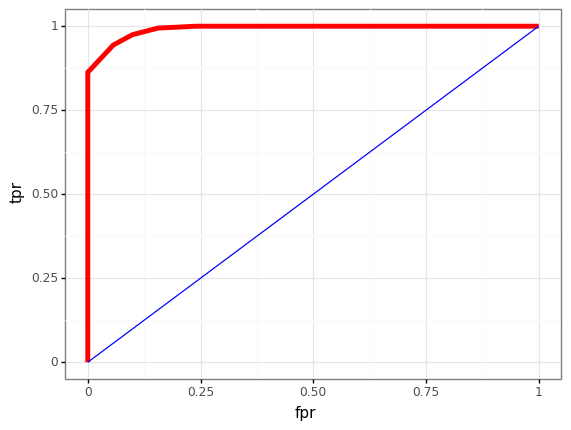


Valor del AUC: 0.9916957348977327


In [23]:
#Calculando los tpr and fpr
from sklearn import metrics as mt
fpr, tpr, thresholds = mt.roc_curve(cancer.target,pred_proba[:,1])
print("Límites",thresholds)

tempDF=pd.DataFrame(zip(fpr,tpr),columns=["fpr","tpr"])
#Curva ROC
print(ggplot(tempDF)+aes(x="fpr",y="tpr")+geom_line(color="red",size=2)+
    annotate("segment",x=0,y=0,xend=1,yend=1,color="blue")+
    theme_bw()
)

#Valor del AUC
print("Valor del AUC:",mt.auc(fpr,tpr))

In [70]:
fpr

array([0.        , 0.        , 0.05660377, 0.0990566 , 0.15566038,
       0.24056604, 1.        ])

In [69]:
tpr

array([0.        , 0.8627451 , 0.94397759, 0.97478992, 0.99439776,
       1.        , 1.        ])

In [71]:
thresholds

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

# Buscando el mejor límite
El mejor límite posible está dado por un alto tpr y un bajo fpr. Podemos buscar este valor a través del g-means, Youden’s J statistic, o simplemente en forma visual, a través de un gráfico de los tpr y 1-fpr en un mismo gráfico y ver donde se intersectan.

In [24]:
#gmeans
gmeans = np.sqrt(tpr * (1-fpr))
ix= np.argmax(gmeans)
print("El mejor threshold según g-means es ",thresholds[ix])

J = tpr-fpr
ix= np.argmax(J)
print("El mejor threshold según Youden es ",thresholds[ix])

El mejor threshold según g-means es  0.8
El mejor threshold según Youden es  0.8


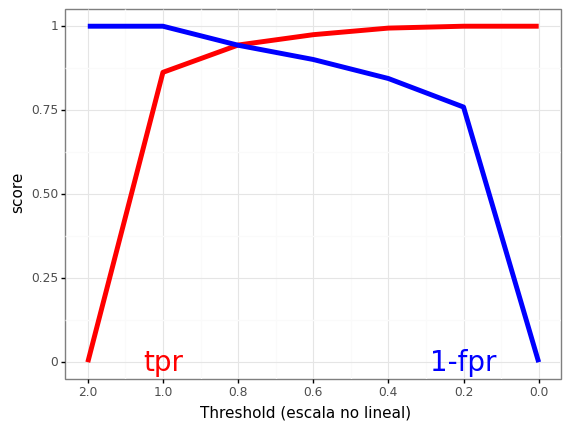


Valor del límite (no sigue una escala):  0.0
1.0 1.0


In [43]:
fpr, tpr, thresholds = mt.roc_curve(cancer.target,pred_proba[:,1])
tempDF=pd.DataFrame(zip(fpr,tpr),columns=["fpr","tpr"])
print(ggplot(tempDF)+aes(x=range(len(thresholds)))+
 theme_bw()+
 geom_line(aes(y=tpr),color="red",size=2)+
 geom_line(aes(y=1-fpr),color="blue",size=2)+
 annotate("text",label="tpr",x=1,y=0,color="red",size=20)+
 annotate("text",label="1-fpr",x=len(thresholds)-2,y=0,color="blue",size=20)+
 scale_x_continuous(labels=thresholds,breaks=range(len(thresholds)))+
 labs(x="Threshold (escala no lineal)",y="score")
)
print("Valor del límite (no sigue una escala): ",thresholds[6])
print(fpr[6],tpr[6])

# Función train_test_split

La función train_test_split de sklearn.model_selection nos permite separar los datos en entrenamiento y test.<br>
train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)<br>
Parámetros
* *arrays: Arreglos con los datos a separar
* test_size: valor entre 0 y 1 correspondiente a la proporción de datos a utilizar para los datos de test. Si no se define es el complemento de train_size.
* train_size: valor entre 0 y 1 correspondiente a la proporción de datos a utilizar para los datos de entrenamiento. Si no se define es el complemento de test_size.
* random_state: valor entero, permite replicar un experimiento al setear la semilla de los números aleatorios.
* shuffle: booleano, en caso de verdadero los datos se "barajan" antes de ser separados.
* stratify: Arreglo con etiquetas. En el caso que se entregue la separación mantiene la proporción de las etiquetas en cada muestra.


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, test_size=0.33, random_state=42)

In [81]:
#Creando un objeto KNN con las condiciones iniciales
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3,weights="uniform")
KNN=KNN.fit(X_train,y_train)

#Aplicando el modelo a otros datos
prediccion=KNN.predict(cancer.data)
print("Accuracy del modelo, para cada clase:",mt.accuracy_score(cancer.target,prediccion))
print("Presición del modelo, para cada clase:",mt.precision_score(cancer.target,prediccion,labels=[0,1],average=None))
print("Recall del modelo para cada clase:",mt.recall_score(cancer.target,prediccion,labels=[0,1],average=None))
print("F1-score del modelo para cada clase:",mt.f1_score(cancer.target,prediccion,labels=[0,1],average=None))

Accuracy del modelo, para cada clase: 0.9437609841827768
Presición del modelo, para cada clase: [0.94554455 0.94277929]
Recall del modelo para cada clase: [0.9009434  0.96918768]
F1-score del modelo para cada clase: [0.92270531 0.9558011 ]


# Curva de aprendizaje (reclasificación), sobre datos de IRIS

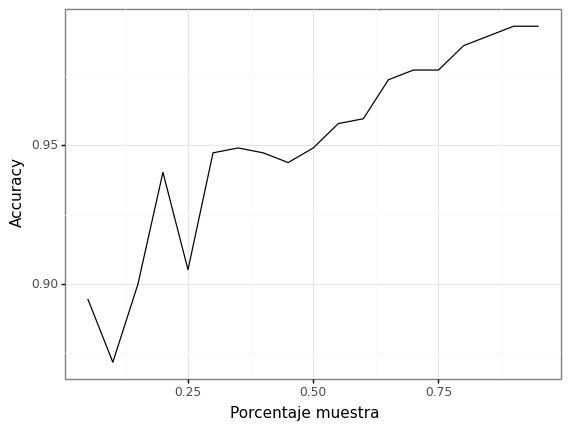

<ggplot: (8779729987609)>

In [82]:
#Visualizando comportamiento a medida que aumenta el tamaño de la muestra
allAcc=np.zeros((len(np.arange(0.05,1.0,0.05)),1))

#Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
index=0
for i in np.arange(0.05,1.0,0.05):
    #Generando las distintas separaciones
    X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, train_size=i)
        
    #Entrenando y aplicando el modelo
    KNN = KNeighborsClassifier(n_neighbors=1,weights="uniform")
    KNN = KNN.fit(X_train,y_train)
    prediccion=KNN.predict(cancer.data)
        
    #Evaluando el modelo
    allAcc[index]=mt.accuracy_score(cancer.target,prediccion)
    index+=1

#Gráfico de los valores
tempDF=pd.DataFrame(allAcc,columns=["Acc"])
tempDF["ejeX"]=np.arange(0.05,1.0,0.05)
(ggplot(tempDF)+aes(x="ejeX",y="Acc")+
 geom_line()+
 labs(x="Porcentaje muestra",y="Accuracy")+
 theme_bw()
)

In [83]:
#Visualizando comportamiento a medida que aumenta el tamaño de la muestra
allMeanAcc=np.zeros((len(np.arange(0.05,1.0,0.05)),1))
allStdAcc=np.zeros((len(np.arange(0.05,1.0,0.05)),1))
index=0
numExp=20
#Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
for i in np.arange(0.05,1.0,0.05):
    tempVal=np.zeros((numExp,1))
    #Iterando sobre el número de experimentos
    for j in range(numExp):
        #Generando las distintas separaciones
        X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, train_size=i)
        
        #Entrenando y aplicando el modelo
        KNN = KNeighborsClassifier(n_neighbors=1,weights="uniform")
        KNN=KNN.fit(X_train,y_train)
        prediccion=KNN.predict(cancer.data)
        
        #Evaluando el modelo
        tempVal[j]=mt.accuracy_score(cancer.target,prediccion)
    allMeanAcc[index]=tempVal.mean()
    allStdAcc[index]=tempVal.std()
    index=index+1

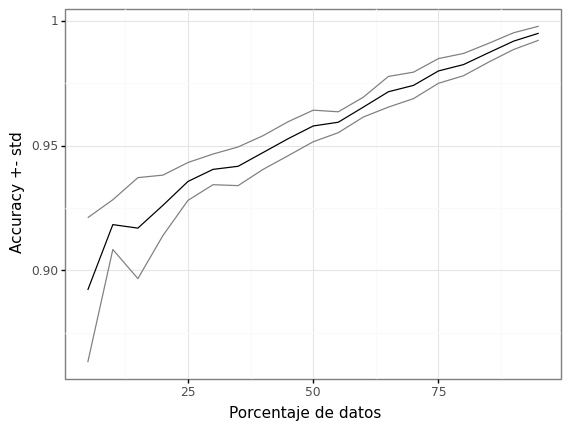

<ggplot: (8779727795634)>

In [84]:
#Creando el dataframe a graficar
tempDF=pd.DataFrame(allMeanAcc,columns=["mean"])
tempDF['std']=allStdAcc
tempDF['ejeX']=np.arange(0.05,1.0,0.05)*100

#Gráfico de los valores
(ggplot(tempDF)+aes(x="ejeX")+
 geom_line(aes(y="mean-std"),color="grey")+
 geom_line(aes(y="mean+std"),color="grey")+
 geom_line(aes(y="mean"),color="black")+
 labs(x="Porcentaje de datos",y="Accuracy +- std")+
 theme_bw()
)


# Curva de aprendizaje (muestras separadas)

In [85]:
#Visualizando comportamiento a medida que aumenta el tamaño de la muestra
allMeanAcc=np.zeros((len(np.arange(0.05,1.0,0.05)),1))
allStdAcc=np.zeros((len(np.arange(0.05,1.0,0.05)),1))
index=0
numExp=20
#Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
for i in np.arange(0.05,1.0,0.05):
    tempVal=np.zeros((numExp,1))
    #Iterando sobre el número de experimentos
    for j in range(numExp):
        #Generando las distintas separaciones
        X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,train_size=0.7)
        #El random state me permite que cada separación del i% sea la misma
        X_train, null, y_train, null = train_test_split(X_train,y_train,train_size=i)
        
        #Entrenando y aplicando el modelo
        KNN = KNeighborsClassifier(n_neighbors=3,weights="uniform")
        KNN=KNN.fit(X_train,y_train)
        prediccion=KNN.predict(X_test)
        
        #Evaluando el modelo
        tempVal[j]=mt.accuracy_score(y_test,prediccion)
    allMeanAcc[index]=tempVal.mean()
    allStdAcc[index]=tempVal.std()
    index=index+1

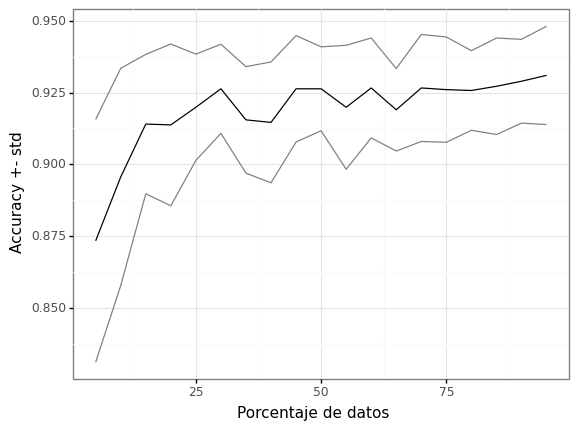

<ggplot: (8779728921661)>

In [86]:
#Creando el dataframe a graficar
tempDF=pd.DataFrame(allMeanAcc,columns=["mean"])
tempDF['std']=allStdAcc
tempDF['ejeX']=np.arange(0.05,1.0,0.05)*100

#Gráfico de los valores
(ggplot(tempDF)+aes(x="ejeX")+
 geom_line(aes(y="mean-std"),color="grey")+
 geom_line(aes(y="mean+std"),color="grey")+
 geom_line(aes(y="mean"),color="black")+
 labs(x="Porcentaje de datos",y="Accuracy +- std")+
 theme_bw()
)

#### Comparando curva de entrenamiento vs test

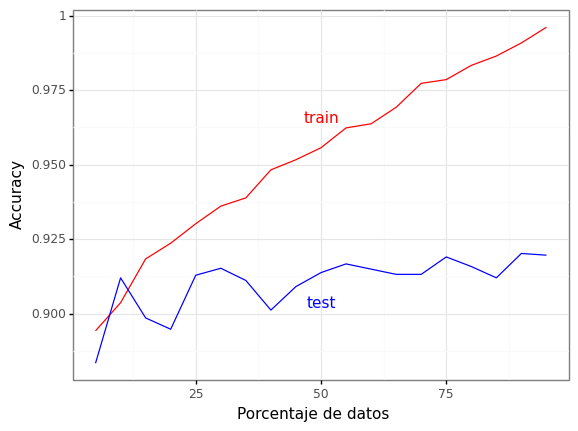

<ggplot: (8779728289076)>

In [87]:
#Visualizando comportamiento a medida que aumenta el tamaño de la muestra
allMeanAccTrain=np.zeros((len(np.arange(0.05,1.0,0.05)),1))
allMeanAccTest=np.zeros((len(np.arange(0.05,1.0,0.05)),1))
index=0
numExp=20
#Iterando sobre los distintos porcentajes (no se permite un train_size igual a 1.0)
for i in np.arange(0.05,1.0,0.05):
    tempVal=np.zeros((numExp,1))
    tempVal2=np.zeros((numExp,1))    
    #Iterando sobre el número de experimentos
    for j in range(numExp):
        #Generando las distintas separaciones
        X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,train_size=0.7)
        X_train2, null, y_train2, null = train_test_split(X_train,y_train,train_size=i)
        
        #Entrenando y aplicando el modelo
        KNN = KNeighborsClassifier(n_neighbors=1,weights="uniform")
        KNN=KNN.fit(X_train2,y_train2)
        prediccion=KNN.predict(X_test)
        tempVal[j]=mt.accuracy_score(y_test,prediccion)
        prediccion=KNN.predict(X_train)
        tempVal2[j]=mt.accuracy_score(y_train,prediccion)        
    allMeanAccTest[index]=tempVal.mean()    
    allMeanAccTrain[index]=tempVal2.mean()
    index=index+1

#Creando el dataframe a graficar
tempDF=pd.DataFrame(allMeanAccTrain,columns=["meanTrain"])
tempDF['meanTest']=allMeanAccTest
tempDF['ejeX']=np.arange(0.05,1.0,0.05)*100

#Gráfico de los valores
(ggplot(tempDF)+aes(x="ejeX")+
 geom_line(aes(y="meanTrain"),color="red")+
 geom_line(aes(y="meanTest"),color="blue")+ 
 labs(x="Porcentaje de datos",y="Accuracy")+
 annotate("text",label="train",x=50,y=tempDF.meanTrain[9]+0.01,color="red")+
 annotate("text",label="test",x=50,y=tempDF.meanTest[9]-0.01,color="blue")+
 theme_bw()
)

# k-fold cross-validation

El objeto KFold de sklearn.model_selection permite separar los datos en K-fold. A pesar de haber otras funciones que también permiten aplicar y evaluar k-fold cross validation en forma sencilla, esta separación/evaluación no se podría usar con otros modelos que no fueran de sklearn.<br><br>

La función no separa los datos, simplemente retorna los índices de cada fold, la separación se hace de forma posterior.<br>
KFold(n_splits=5, shuffle=False, random_state=None)<br>
Parámetros
* n_splits: número de folds a utilizar
* random_state: valor entero, permite replicar un experimento al setear la semilla de los números aleatorios.
* shuffle: booleano, en caso de verdadero los datos se "barajan" antes de ser separados.<br><br>

Métodos
* split(X[, y, groups]): Genera los índices para separar los datos de entrenamiento y test.

In [61]:
#Creando el objeto con sus características 
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,shuffle=True)
print(kf)

#Generando los k-fold
temp=kf.split(cancer.data)
for train_index, test_index in temp:
    print("TRAIN:", train_index, "\nTEST:", test_index,"\n\n")

KFold(n_splits=10, random_state=None, shuffle=True)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  23  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  39  40  41  43  44  45  46  47  48  49  50  51  52  53  55  57  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 114 115
 117 118 119 120 122 124 125 126 127 128 129 130 131 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 182 183 184 185 186 187 188 189 190 191 192 194
 195 196 197 198 199 200 201 202 203 204 206 207 208 209 210 211 214 215
 216 217 218 219 220 221 222 224 225 226 227 228 229 230 231 232 234 235
 236 237 238 239 240 241 242 243 245 246 247 249 250 251 252 254 

In [88]:
#Analizando el error de un modelo
#Creando los objetos con sus características 
numFolds=10
kf = KFold(n_splits=numFolds,shuffle=True)
KNN = KNeighborsClassifier(n_neighbors=10,weights="uniform")

#Generando los k-fold
temp=kf.split(cancer.data)

allAccTest=np.zeros((numFolds,1))
index=0
for train_index, test_index in temp:
    KNN=KNN.fit(cancer.data[train_index,:],cancer.target[train_index])
    prediccion=KNN.predict(cancer.data[test_index,:])
    allAccTest[index]=mt.accuracy_score(cancer.target[test_index],prediccion)
    index+=1
print("Average error: ",allAccTest.mean(),"+-",allAccTest.std())

Average error:  0.9349310776942357 +- 0.04586278919236777


# Buscando el mejor valor de K

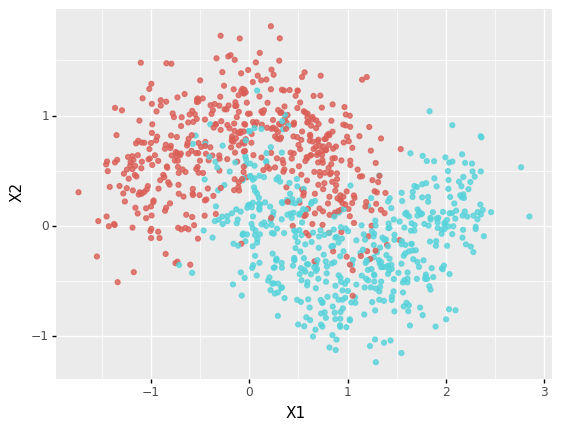

<ggplot: (8779728090546)>

In [89]:
#Generando dos lunas
from sklearn.datasets import make_moons
tempData=make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=10)
tempDF=pd.DataFrame(zip(tempData[0][:,0],tempData[0][:,1],tempData[1]),columns=["X1","X2","Label"])
(ggplot(tempDF)
 +aes(x="X1",y="X2",color="factor(Label)")
 +geom_point(show_legend=False, alpha=0.8)
)

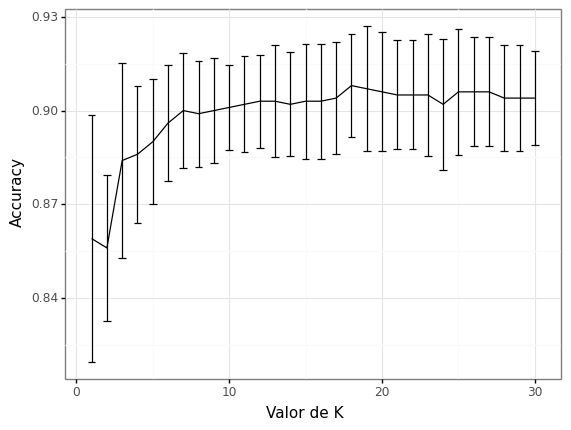

<ggplot: (8779728815062)>

In [90]:
#Analizando el error de un modelo
#Creando los objetos con sus características 
maxK=30
numFolds=10
kf = KFold(n_splits=numFolds,shuffle=True,random_state=0)

allMeanTest=np.zeros((maxK,1))
allStdTest=np.zeros((maxK,1))
for i in range(maxK):
    index=0
    tempAcc=np.zeros((numFolds,1))
    KNN = KNeighborsClassifier(n_neighbors=i+1,weights="uniform")
    for train_index, test_index in kf.split(tempData[0]):
        KNN=KNN.fit(tempData[0][train_index,:],tempData[1][train_index])
        prediccion=KNN.predict(tempData[0][test_index,:])
        tempAcc[index]=mt.accuracy_score(tempData[1][test_index],prediccion)
        index+=1
    allMeanTest[i]=tempAcc.mean()
    allStdTest[i]=tempAcc.std()    

#Creando el dataframe a graficar
tempDF=pd.DataFrame(allMeanTest,columns=["meanTest"])
tempDF['stdTest']=allStdTest
tempDF['ejeX']=np.arange(1,maxK+1,1)

#Gráfico de los valores
(ggplot(tempDF)+aes(x="ejeX",y="meanTest",ymin="meanTest-stdTest",ymax="meanTest+stdTest")+
 geom_line()+
 geom_errorbar()+ 
 labs(x="Valor de K",y="Accuracy")+
 theme_bw()
)
